In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
world_cup=pd.read_csv('World Cup 2019 Dataset.csv')
result=pd.read_csv('results.csv')
fixtures=pd.read_csv('fixtures.csv')
ranking=pd.read_csv('icc_rankings.csv')

In [3]:
world_cup.head()

,Team,Group,Previous \r\nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\r\n semifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4


In [4]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Team                    10 non-null     object
 1   Group                   10 non-null     object
 2   Previous 
appearances  10 non-null     int64 
 3   Previous 
titles       10 non-null     int64 
 4   Previous
 finals       10 non-null     int64 
 5   Previous
 semifinals   10 non-null     int64 
 rank          10 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 688.0+ bytes


In [5]:
world_cup.describe()

,Previous \r\nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\r\n semifinals,Current \r rank
count,10.00000,10.000000,10.000000,10.000000,10.00000
mean,8.90000,1.100000,2.100000,4.300000,5.50000
std,3.60401,1.595131,1.911951,2.540779,3.02765
min,1.00000,0.000000,0.000000,0.000000,1.00000
25%,7.25000,0.000000,0.250000,4.000000,3.25000
50%,11.00000,0.500000,2.500000,4.500000,5.50000
75%,11.00000,1.750000,3.000000,6.000000,7.75000
max,11.00000,5.000000,6.000000,7.000000,10.00000


In [6]:
result.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [7]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    996 non-null    object
 1   Team_1  996 non-null    object
 2   Team_2  996 non-null    object
 3   Winner  996 non-null    object
 4   Margin  947 non-null    object
 5   Ground  996 non-null    object
dtypes: object(6)
memory usage: 46.8+ KB


In [8]:
india=result[(result['Team_1']=='India')|(result['Team_2']=='India')]
india.head()

,date,Team_1,Team_2,Winner,Margin,Ground
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka


In [9]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = result[result['Team_1'].isin(worldcup_teams)]
df_teams_2 = result[result['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

date      1445
Team_1    1445
Team_2    1445
Winner    1445
Margin    1368
Ground    1445
dtype: int64

In [10]:
worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
                  'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
                  'Australia', 'Bangladesh', 'India']

df_teams_1 = result[result['Team_1'].isin(worldcup_teams)]
df_teams_2 = result[result['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates(inplace=True)  # Remove duplicates in place
row_count = df_teams.shape[0]  # Count the number of rows

print("Number of rows in filtered DataFrame:", row_count)

Number of rows in filtered DataFrame: 894


In [11]:
#dropping columns that wll not affect match outcomes
df_teams_2010 = df_teams.drop(['date','Margin', 'Ground'], axis=1)
df_teams_2010.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [12]:
#Building the model
#the prediction label: The winning_team column will show "1" Team 1 has won and "2" if the away team has won.

df_teams_2010 = df_teams_2010.reset_index(drop=True)
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_1,'winning_team']=1
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_2, 'winning_team']=2
df_teams_2010 = df_teams_2010.drop(['winning_team'], axis=1)

df_teams_2010.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [13]:
#convert team-1 and team-2 from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_2010, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]


# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=204)


In [14]:
final.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Sri Lanka,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,India,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sri Lanka,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,India,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train1 = sc.transform(X_train)
X_test1 = sc.transform(X_test)

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

# print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.698
Test set accuracy:  0.673


In [39]:
from sklearn.svm import SVC
knn=SVC()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
knn.score(X_test,y_test)


0.6431226765799256

In [41]:
lr = LogisticRegression() 
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6728624535315985

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
classifier.score(X_test, y_test)

0.6356877323420075

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='auto'), X, y,cv=3)
# print(score_lr)
# print("Avg :",np.average(score_lr))

In [25]:
#adding ICC rankings
#the team which is positioned higher on the ICC Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "Team_1" column

# Loading new datasets
ranking = pd.read_csv('icc_rankings.csv') 
fixtures = pd.read_csv('fixtures.csv')

# List for storing the group stage games
pred_set = []

In [26]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,3/7/2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,4/7/2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,5/7/2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,9.0,2.0,6/7/2019,"Headingley, Leeds",Sri Lanka,India,Group A,NaN
44,1,5.0,3.0,6/7/2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


In [27]:
ranking.head()

,Position,Team,Points
0,1,England,125
1,2,India,121
2,3,South Africa,115
3,4,New Zealand,113
4,5,Australia,109


In [28]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None


In [29]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

South Africa and England
Winner: England

West Indies and Pakistan
Winner: Pakistan

Sri Lanka and New Zealand
Winner: New Zealand

Afghanistan and Australia
Winner: Australia

Bangladesh and South Africa
Winner: South Africa

Pakistan and England
Winner: England

Afghanistan and Sri Lanka
Winner: Sri Lanka

South Africa and India
Winner: India

Bangladesh and New Zealand
Winner: New Zealand

West Indies and Australia
Winner: Australia

Sri Lanka and Pakistan
Winner: Pakistan

Bangladesh and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Australia and India
Winner: India

West Indies and South Africa
Winner: South Africa

Sri Lanka and Bangladesh
Winner: Bangladesh

Pakistan and Australia
Winner: Australia

New Zealand and India
Winner: India

West Indies and England
Winner: England

Sri Lanka and Australia
Winner: Australia

Afghanistan and South Africa
Winner: South Africa

Pakistan and India
Winner: India

West Indies and Bangladesh
Winner: Bangladesh

Afg

In [31]:
prediction=logreg.predict(pred_set)

In [32]:
for i in range(len(prediction)):
    fixtures['Result'].iloc[i]=prediction[i]

<Axes: >

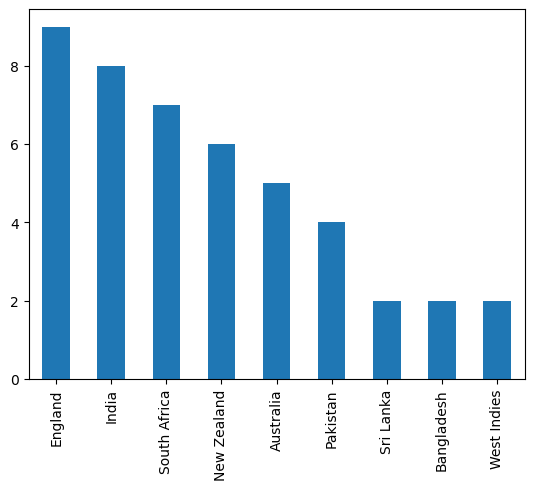

In [33]:
fixtures['Result'].value_counts().plot(kind='bar')

In [34]:
# List of tuples before 
semi = [('New Zealand', 'India'),
            ('England', 'Australia')]

In [35]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [36]:
clean_and_predict(semi, ranking, final, logreg)

New Zealand and India
Winner: India

Australia and England
Winner: England



In [37]:
# Finals
finals = [('India', 'England')]

In [38]:
clean_and_predict(finals, ranking, final, logreg)

India and England
Winner: England

